# Natural Language Processing

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None
import nltk
import numpy as np

All data for this project was retrieved in R using the geniusR package to connect to Genius Lyric's API and wrote it to a CSV file. There are 11 artists from four general genres, each with three albums to represent them.

In [2]:
lyrics = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\lyrics_final.csv', sep='\t',low_memory=False,  header=0, index_col=0, encoding='cp1252')
lyrics.head(5)

,title,track_n,text,album,artist
1,London Calling,1,London calling to the faraway towns,London Calling,The Clash
2,London Calling,1,Now war is declared and battle come down,London Calling,The Clash
3,London Calling,1,London calling to the underworld,London Calling,The Clash
4,London Calling,1,"Come outta' the cupboard, ya' boys and girls",London Calling,The Clash
5,London Calling,1,"London calling, now don't look to us",London Calling,The Clash


The lyrics come out with one observation for each line in a song. To start off, I'm going to group by song for prediction. Eventually, I'll group by album and artist to cluster.

There are some quirks in the lyrics and their titles. I'll get rid of text like: " - Remastered 2017" in the title and convert "in'" verbs to "ing." Then I'll make a quick ID variable.

In [3]:
import re
lyrics = lyrics.sort_values(['album', 'title']).reset_index(drop=True).dropna()

t = []
for row in lyrics['title']:
    t.append((row.split(' (', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' [', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' -', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\'', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\,', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('#!*@', 'fuck', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\?', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\.', '', row))
lyrics['title'] = t

t = []
for row in lyrics['album']:
    t.append((re.sub('\'', '', row)).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' -', 1)[0]).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' (', 1)[0]).lower())  
lyrics['album'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('in\'' , 'ing', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('{intro}', '', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('(intro)', '', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('\\\\', '', row)).lower())  
lyrics['text'] = t

lyrics = lyrics.drop_duplicates()
lyrics['ID'] = lyrics['album'] + ' - ' + lyrics['title']

lyrics = lyrics.groupby(['title','track_n', 'album', 'artist', 'ID'])['text'].apply(lambda x: ','.join(x)).reset_index().sort_values(['album', 'track_n']).drop_duplicates(['artist', 'title'])

t = []
for row in lyrics['text']:
    t.append((re.sub('\,', ' ', row)).lower())  
lyrics['text'] = t

To standardize this a bit more, I'm unpacking contractions to avoid duplication of the same idea with different words.

In [4]:
contractions_dict = {"aren't": "are not",
                      "can't": "cannot",
                      "can't've": "cannot have",
                      "'cause": "because",
                      "could've": "could have",
                      "couldn't": "could not",
                      "couldn't've": "could not have",
                      "didn't": "did not",
                      "doesn't": "does not",
                      "don't": "do not",
                      "hadn't": "had not",
                      "hadn't've": "had not have",
                      "hasn't": "has not",
                      "haven't": "have not",
                      "he'd": "he would",
                      "he'd've": "he would have",
                      "he'll": "he will",
                      "he'll've": "he will have",
                      "he's": "he is",
                      "how'd": "how did",
                      "how'd'y": "how do you",
                      "how'll": "how will",
                      "how's": "how is",
                      "i'd": "i would",
                      "i'd've": "i would have",
                      "i'll": "i will",
                      "i'll've": "i will have",
                      "i'm": "i am",
                      "i've": "i have",
                      "isn't": "is not",
                      "it'd": "it would",
                      "it'd've": "it would have",
                      "it'll": "it will",
                      "it'll've": "it will have",
                      "it's": "it is",
                      "let's": "let us",
                      "ma'am": "madam",
                      "mayn't": "may not",
                      "might've": "might have",
                      "mightn't": "might not",
                      "mightn't've": "might not have",
                      "must've": "must have",
                      "mustn't": "must not",
                      "mustn't've": "must not have",
                      "needn't": "need not",
                      "needn't've": "need not have",
                      "o'clock": "of the clock",
                      "oughtn't": "ought not",
                      "oughtn't've": "ought not have",
                      "shan't": "shall not",
                      "sha'n't": "shall not",
                      "shan't've": "shall not have",
                      "she'd": "she had",
                      "she'd've": "she would have",
                      "she'll": "she will",
                      "she'll've": "she will have",
                      "she's": "she is",
                      "should've": "should have",
                      "shouldn't": "should not",
                      "shouldn't've": "should not have",
                      "so've": "so have",
                      "so's": "so is",
                      "that'd": "that had",
                      "that'd've": "that would have",
                      "that's": "that is",
                      "there'd": "there would",
                      "there'd've": "there would have",
                      "there's": "there is",
                      "they'd": "they would",
                      "they'd've": "they would have",
                      "they'll": "they will",
                      "they'll've": "they will have",
                      "they're": "they are",
                      "they've": "they have",
                      "to've": "to have",
                      "wasn't": "was not",
                      "we'd": "we would",
                      "we'd've": "we would have",
                      "we'll": "we will",
                      "we'll've": "we will have",
                      "we're": "we are",
                      "we've": "we have",
                      "weren't": "were not",
                      "what'll": "what will",
                      "what'll've": "what will have",
                      "what're": "what are",
                      "what's": "what is",
                      "what've": "what have",
                      "when's": "when is",
                      "when've": "when have",
                      "where'd": "where did",
                      "where's": "where is",
                      "where've": "where have",
                      "who'll": "who will",
                      "who'll've": "who will have",
                      "who's": "who is",
                      "who've": "who have",
                      "why's": "why is",
                      "why've": "why have",
                      "will've": "will have",
                      "won't": "will not",
                      "won't've": "will not have",
                      "would've": "would have",
                      "wouldn't": "would not",
                      "wouldn't've": "would not have",
                      "y'all": "you all",
                      "y'all'd": "you all would",
                      "y'all'd've": "you all would have",
                      "y'all're": "you all are",
                      "y'all've": "you all have",
                      "you'd": "you would",
                      "you'd've": "you would have",
                      "you'll": "you will",
                      "you'll've": "you will have",
                      "you're": "you are",
                      "you've": "you have"}

lyrics['text_expanded'] = lyrics['text'].replace(contractions_dict, regex=True)

I went through the songs on each album and identified the covers. Excluding them allows for less ambiguity. Rather than the question being "what kinds of songs would this band do?," I'm exploring the kinds of songs artists write, what they try to communicate in their own words.

In [5]:
cover_dict = {'a sailors guide to earth - in bloom':1, 'axis: bold as love - shes so fine':1,
              'electric ladyland - come on':1, 'electric ladyland - all along the watchtower':1,
             'high top mountain - poor rambler':1, 'high top mountain - id have to be crazy':1,
             'london calling - brand new cadillac':1, 'london calling - the guns of brixton':1,
             'london calling - wrong em boyo':1, 'london calling - revolution rock':1,
             'metamodern sounds in country music - the promise':1, 'pink flag - different to me':1,
             'ramones - lets dance':1, 'road to ruin - needles and pins':1,
             'rocket to russia - do you wanna dance':1, 'rocket to russia - surfin bird':1,
             'sandinista! - junco partner':1, 'sandinista! - look here':1,
             'station to station - wild is the wind':1, 'the clash - police and thieves':1,
             'the late great townes van zandt - fraulein':1, 'the silver tongued devil and i - good christian soldier':1,
             'jesus was a capricorn - jesus was a capricorn':1}
lyrics['cover'] = lyrics['ID'].map(cover_dict).fillna(0)
lyrics = lyrics[lyrics['cover'] != 1].reset_index(drop=True)

lyrics = lyrics[lyrics['text_expanded'] != '(instrumental)']

In [6]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import text 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

C:\Users\mendo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Some songs in an artist's catalogue are truly unique compared to the rest. In order to avoid the training set having too much of an impact on the conclusions (and because it isn't too computationally expensive), I'm running the analysis with 100 different random splits and combining the predictions into one data set. From there, I'm calculating an average prediction percentage for each combination of artists and predeicted artists. I'm also compiling a data frame keeping each song prediction for future reference.

In [7]:
info = pd.DataFrame()
songs = pd.DataFrame()
fscores = []

y = lyrics['artist']

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(lyrics['text_expanded'], y, test_size=0.3, random_state=i, stratify=y)

    text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=True)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=.001, n_iter=None,
                                                   max_iter=20, tol=None, random_state=13))])

    text_clf.fit(X_train, y_train)
    pred = text_clf.predict(X_test)
    fscore = metrics.f1_score(y_test, pred, average='weighted')
    fscores.append(fscore)
    
    test1 = pd.DataFrame(y_test).reset_index()
    test2 = pd.DataFrame(X_test).reset_index()

    rig = test1.merge(test2, how='inner', on='index')
    rig['pred'] = pred

    a = []
    for index, row in rig.iterrows():
        if row['artist'] == row['pred']:
            a.append(1)
        else:
            a.append(0)
        
    rig['pred_binary'] = a
    rig['count'] = 1
    
    rig = lyrics.merge(rig, how='inner', on='text_expanded')
    rig = rig[['album', 'track_n', 'title', 'text_expanded', 'artist_x', 'pred', 'count']].sort_values(['artist_x', 'album', 'track_n'])
    rig.columns = ['album', 'track_n', 'song_title', 'text_expanded', 'artist', 'predicted_artist', 'count']
    s = rig
    rig = rig[['artist', 'predicted_artist', 'count']]
    rig = pd.pivot_table(rig, values='count', index='artist', columns=['predicted_artist'], aggfunc=np.sum, fill_value=0)
    
    if info.empty:
        info = rig
    else:
        info = info.append(rig)
        
    if songs.empty:
        songs = s
    else:
        songs = songs.append(s)

print('Average F-score: {0}'.format(round(np.mean(fscores), 2)))

Average F-score: 0.79


Solid prediction score, considering there's 11 categories to choose from.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

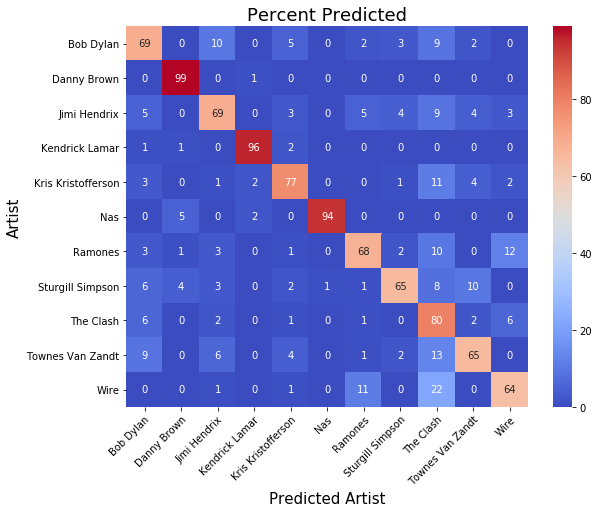

In [9]:
info_agg = info.groupby('artist').mean()

info_avg = info_agg.T
artists = list(info_avg.columns.values)

for artist in artists:
    info_avg[artist] = round((info_avg[artist] / info_avg[artist].sum())*100, 0)
info_avg = info_avg.T

f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(info_avg, cmap='coolwarm', annot=True)
plt.xlabel('Predicted Artist', fontsize=15)
plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.ylabel('Artist', fontsize=15)
plt.title('Percent Predicted', fontsize=18)
plt.show()

In [10]:
info_avg1 = info_avg[['Bob Dylan', 'Jimi Hendrix', 'Sturgill Simpson', 'Townes Van Zandt',
                             'Kris Kristofferson', 'Ramones', 'The Clash', 'Wire', 'Kendrick Lamar',
                             'Danny Brown', 'Nas']]

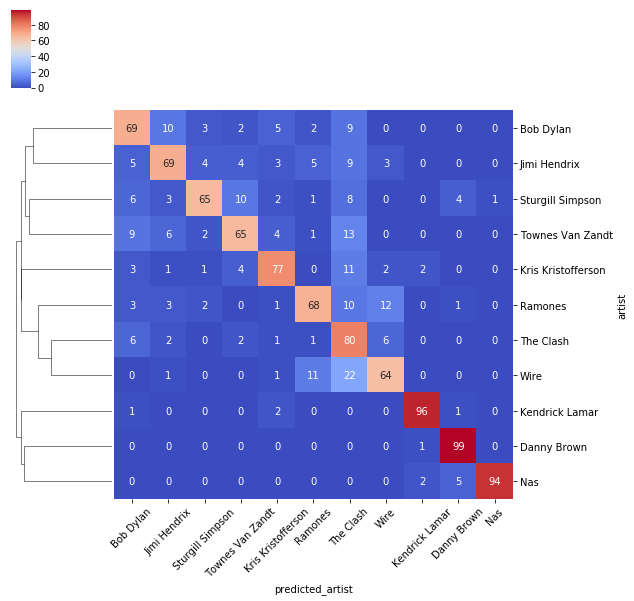

In [11]:
cluster = sns.clustermap(info_avg1, cmap='coolwarm', annot=True, col_cluster=False, figsize=(9, 9), metric='correlation')
plt.setp(cluster.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
plt.show()

The most unique lyricist is Danny Brown--after looking into it, the only song that got predicted incorrectly had verses by Kendrick Lamar. Rap artists in general have a more unique cataogue. This isn't too surprising given the volume of words in a rap song versus, for example, a minute and a half song by the Ramones.

The Clash were the most well-predicted punk band and actually took a lot away from every artist outside of rap. They had a wide range of topics in their songs, ranging from general mayhem to political statements and span positivity and negativity. 

Kris Kristofferson has the most distinctive catalogue for the country artists. They're all heavy hitters in my mind so it's not immediately obvious why he stands out. 

Sturgill Simpson, Jimi Hendrix, and Bob Dylan have the widest spread of incorrect predictions. They all have a spread of love songs and more psychedlic musings on life and they do have more than a touch of disillusionment in what they have to say.

The cross-genre predictions are interesting as well. Danny Brown and Sturgill have the most overlap for the country-rap combo. Townes Van Zandt and The Clash have some significant overlap.

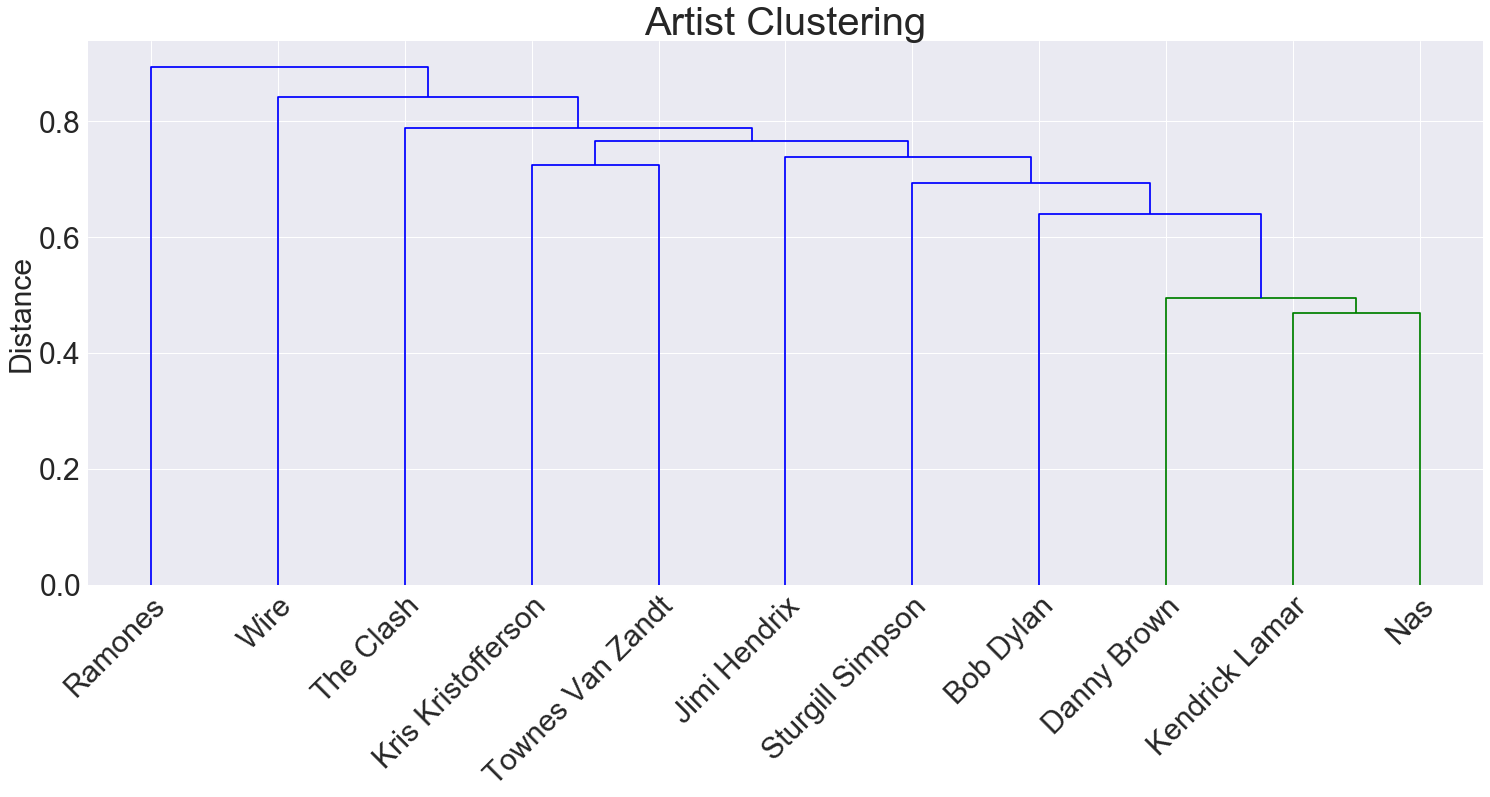

In [12]:
vectorizer = TfidfVectorizer(lowercase=True, max_df=0.7, min_df=0.001,
                             ngram_range=(1,3),norm=None)

lyrics["vectors_unnormalised"] = list(vectorizer.fit_transform(lyrics['text'].values).toarray())

def normalise(vec):
    return vec / np.dot(vec,vec)
def combine_vectors(vectors):
    return normalise(np.sum(vectors, axis=0))

lyrics["vectors"] = lyrics['vectors_unnormalised'].apply(normalise)

band_vectors = (
    lyrics
    .groupby("artist")
    .vectors
    .apply(combine_vectors)
)

from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster

Z = linkage(np.stack(list(band_vectors.values)), method='complete', metric="cosine")

n_clusters = fcluster(Z, .2, criterion='distance')

sns.set()
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance', fontsize=30)

dendrogram(Z, labels=band_vectors.index.values)
plt.title("Artist Clustering", fontsize=40)
plt.xticks(fontsize=30, rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.yticks(fontsize=30)
plt.show()

These general groupings match pretty well with the loose genre designation I gave them. But I was expecting more overlap between punk and rap. As a general vibe, I think that makes sense, but rap lyrics are much more dense and therefore likely to have some creativity that a punk medium doesn't allow (if they're folling the typical minimalist approach). It's also surprising that rap and country cluster together before the genre-bending Dylan and Hendrix. I think it makes sense that they're close together--they were both excellent storytellers, whereas the country artists I included are less about the classic country ballad and more about capturing emotion in a setting.

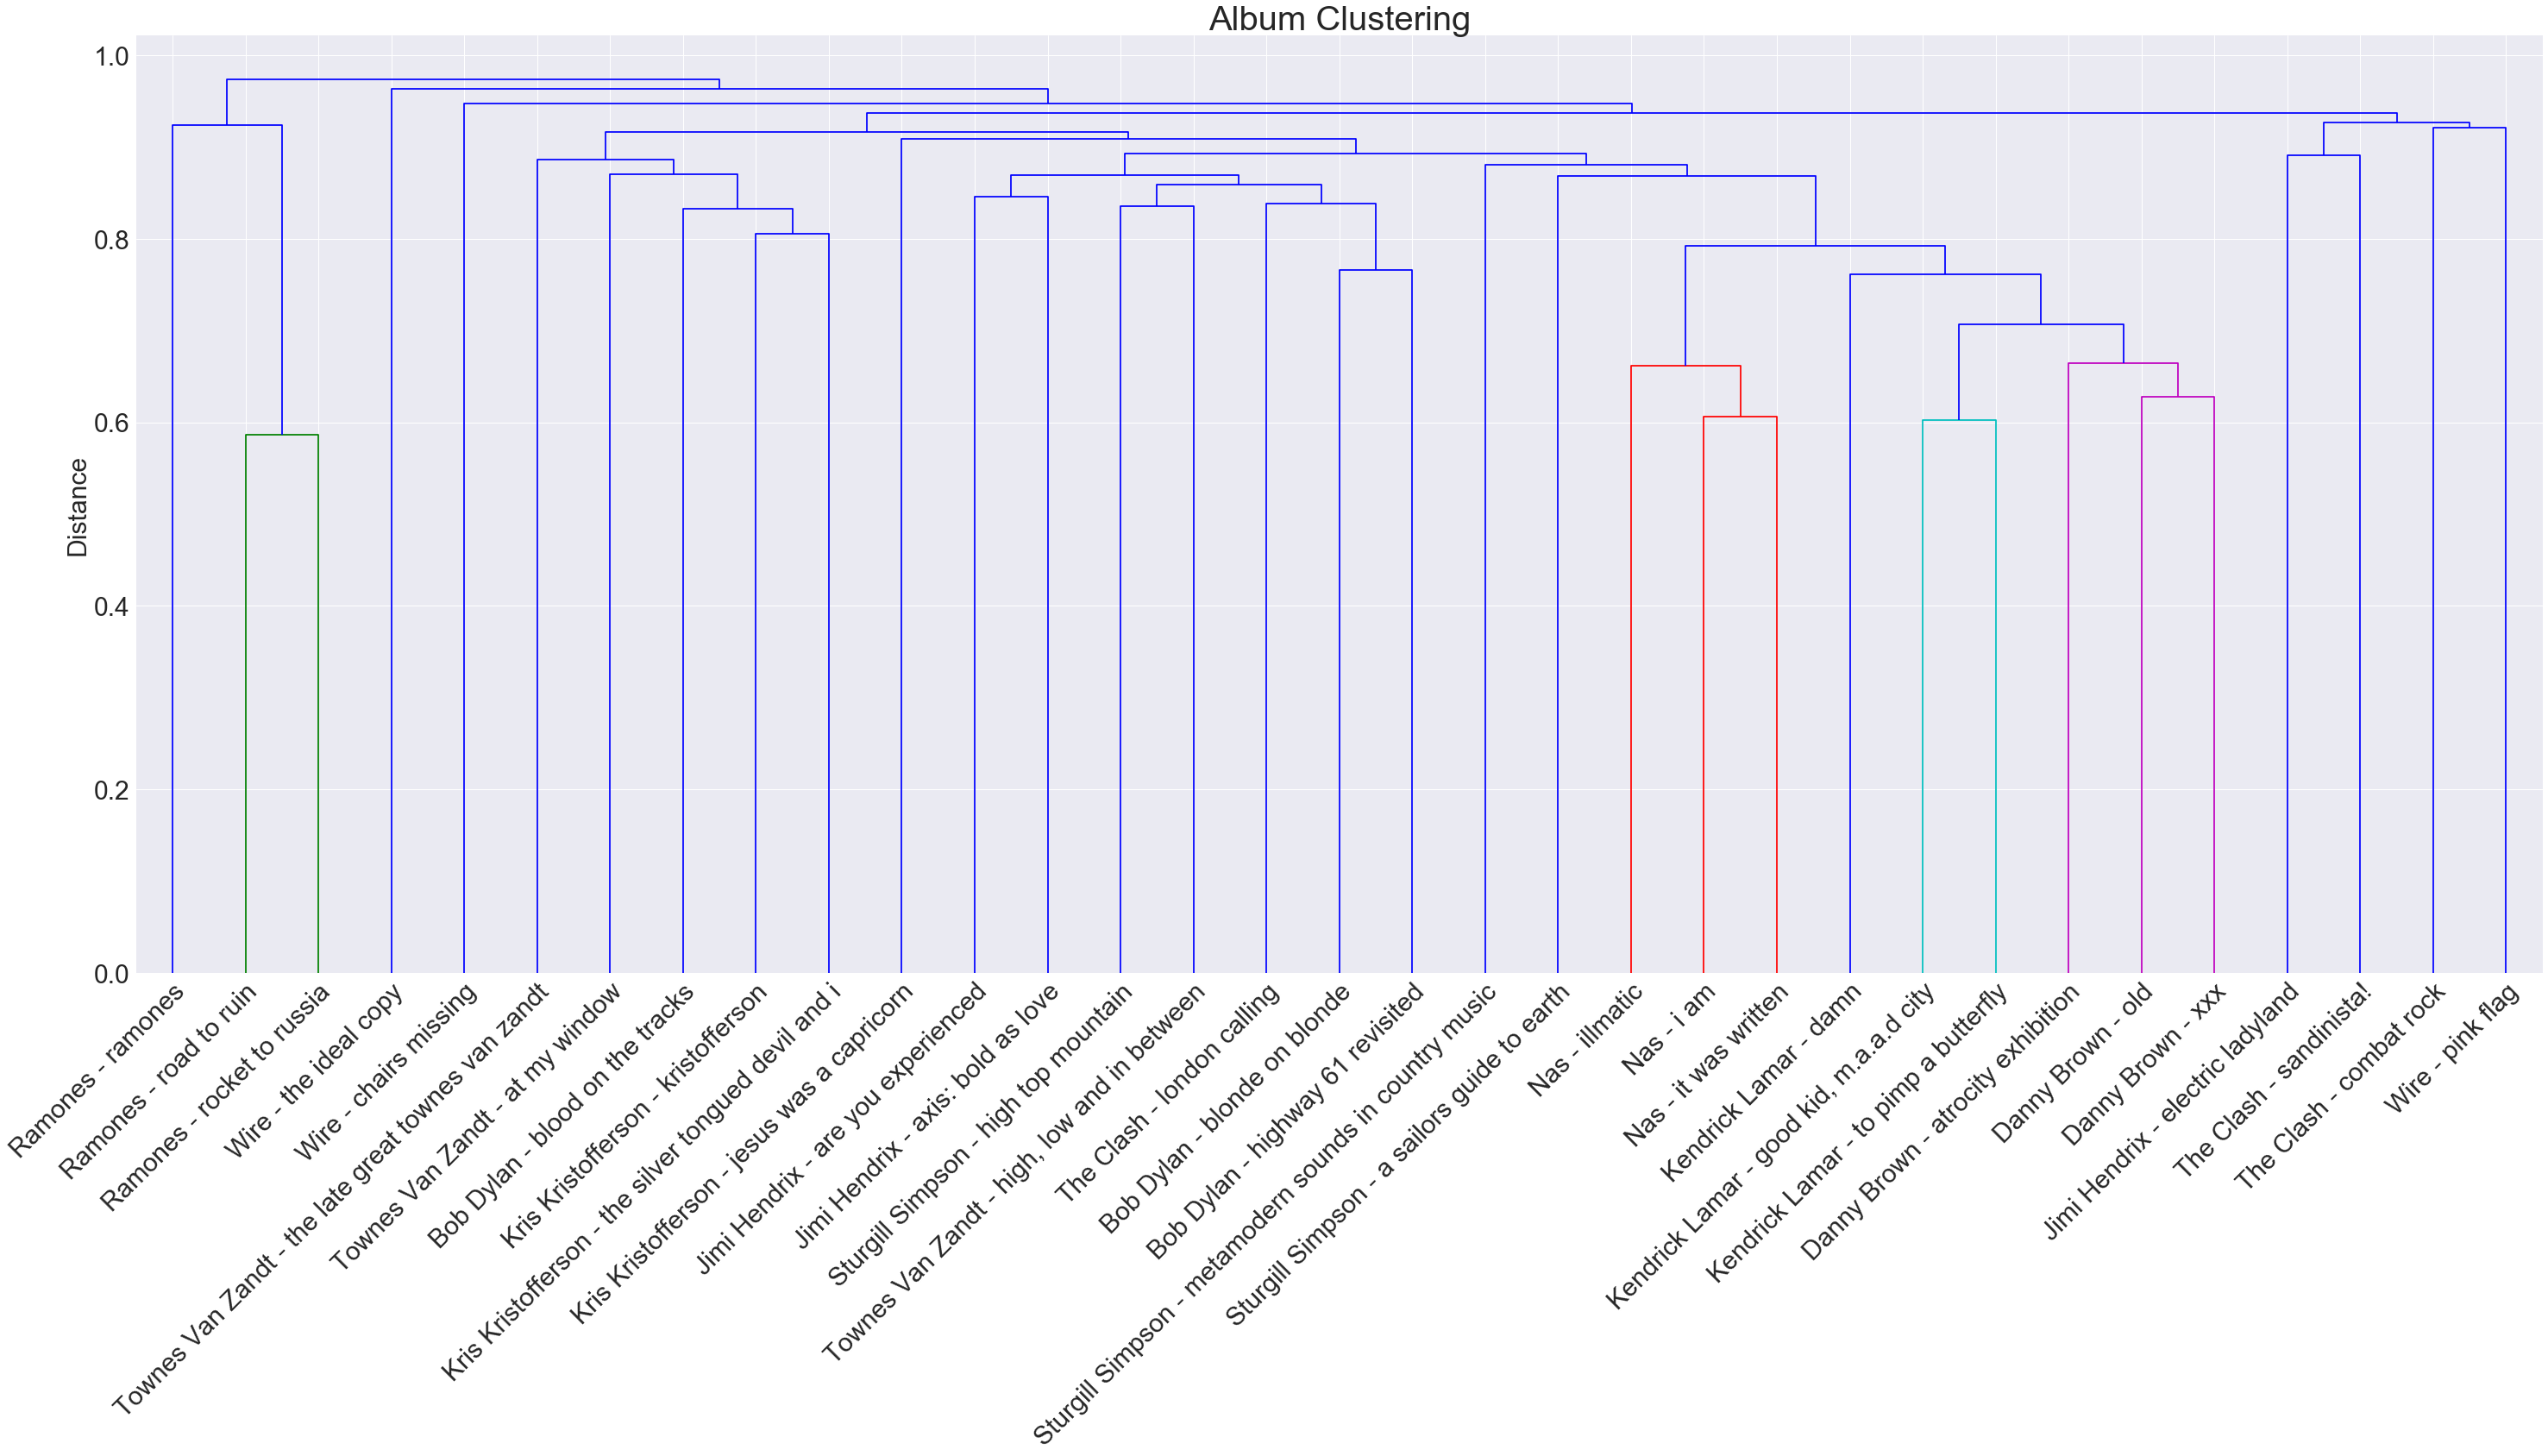

In [13]:
lyrics['artist_album'] = lyrics['artist'] + ' - ' + lyrics['album']

band_vectors = (
    lyrics
    .groupby("artist_album")
    .vectors
    .apply(combine_vectors)
)

from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster

Z = linkage(np.stack(list(band_vectors.values)), method='complete', metric="cosine")

n_clusters = fcluster(Z, 0.57, criterion='distance')

plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance', fontsize=30)

dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=30.,  # font size for the x axis labels
    labels=band_vectors.index.values
)
plt.title("Album Clustering", fontsize=40)
plt.xticks(fontsize=30, rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.yticks(fontsize=30)
plt.show()

The albums group very similarly, though the Clash and Dylan each have a straggler that are separated from the rest. Those albums (Sandanista! and Highway 61 Revisited) are both diverse in their topics. Both of them were pretty revolutionary at that point in their careers. Sandanista! marked an ambitious change from their previous style and the length of the album allows for a much more varied approach. Highway 61 Revisited, also revolutionary for Dylan's career, has a series of rock songs and ends with an incredible (and long) psychedlic folk/country ballad that goes through an imaginary wasteland. That contrast, I think, makes it hard to categorize.

In [14]:
lemmatizer = WordNetLemmatizer()
artists = list(lyrics['artist'].drop_duplicates())
lyrics_trunc = lyrics[['artist', 'text_expanded']]
artists_words = pd.DataFrame()

for artist in artists:
    lyrics_trunc_artist = lyrics_trunc[lyrics_trunc['artist']==artist]
    lyrics_trunc_artist = lyrics_trunc_artist.groupby('artist')['text_expanded'].apply(lambda x: ','.join(x)).reset_index()
    tokens = [w for w in word_tokenize(str(lyrics_trunc_artist['text_expanded'][0])) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    lemmatized = [lemmatizer.lemmatize(t) for t in no_stops]
    count = Counter(lemmatized).most_common(20)
    count = pd.DataFrame(count)
    #count['artists'] = artist
    #artists_words = artists_words.append(count)
    print(artist)
    print(count)
    print()
    print()

Sturgill Simpson
         0   1
0       go  32
1     like  30
2    aingt  26
3     time  25
4     well  25
5      get  24
6      got  24
7      day  24
8     know  23
9      old  22
10    life  21
11   would  19
12  little  18
13     way  18
14      na  16
15    love  15
16   cause  15
17    find  15
18     say  15
19    back  15


Jimi Hendrix
         0   1
0     yeah  52
1     baby  49
2     well  43
3      see  35
4     know  31
5     love  28
6      day  27
7     back  27
8   little  25
9       oh  24
10    want  23
11     say  21
12    like  20
13     way  20
14     hey  20
15     got  19
16    make  19
17    hear  18
18    time  18
19    away  18


Townes Van Zandt
        0   1
0    well  43
1      go  32
2    know  29
3   aingt  26
4    like  26
5    babe  22
6    come  22
7    time  21
8     one  19
9     day  18
10   long  17
11  would  17
12   gone  16
13    let  16
14    say  16
15   feel  16
16    man  16
17    got  15
18   love  15
19    see  14


Danny Brown
        0  

In [15]:
songs1 = songs[['album', 'song_title', 'text_expanded', 'artist', 'predicted_artist', 'count']]
songs1 = songs1.groupby(['album', 'song_title', 'text_expanded', 'artist', 'predicted_artist']).sum()
songs1

count
album                              song_title                                         text_expanded                                      artist             predicted_artist         
a sailors guide to earth           all around you                                     there will be days when the sun will not shine ... Sturgill Simpson   Sturgill Simpson       24
                                   brace for impact                                   one day you wake up and this life will be over ... Sturgill Simpson   Bob Dylan               1
                                                                                                                                                            Jimi Hendrix           20
                                                                                                                                                            The Clash              16
                                   breakers roar                                      oh  how the breakers roar they keep pulling me ... Sturgill Simpson   Sturgill Simpson       27
                                   call to arms                                       i done syria  afganistan  iraq  and iran north ... Sturgill Simpson   Danny Brown             5
                                                                                                                                                            Kendrick Lamar          1
                                                                                                                                                            Sturgill Simpson       29
                                                                                                                                                            Townes Van Zandt        1
                                   keep it between the lines                          do not turn mailboxes into baseballs do not get... Sturgill Simpson   Nas                    10
                                                                                                                                                            Ramones                 1
                                                                                                                                                            Sturgill Simpson        1
                                                                                                                                                            The Clash               1
                                                                                                                                                            Townes Van Zandt       12
                                   oh sarah                                           oh sarah  here we go again i cannot get past th... Sturgill Simpson   Sturgill Simpson       30
                                   sea stories                                        basic was just like papaw says: keep your mouth... Sturgill Simpson   Sturgill Simpson       22
                                   welcome to earth                                   hello  my son welcome to earth you may not be m... Sturgill Simpson   Sturgill Simpson       27
are you experienced                are you experienced                                if you can just get your mind together then com... Jimi Hendrix       Jimi Hendrix           19
                                   can you see me                                     can you see me begging you on my knees? whoa ye... Jimi Hendrix       Jimi Hendrix           26
                                   fire                                               alright now dig this  baby you do not care for ... Jimi Hendrix       Jimi Hendrix           31
                                   foxy lady                                          foxy you know you are a cute little heartbreake... Jimi Hendrix       Jimi Hendrix    

In [16]:
songs2 = songs1.reset_index()

w = []
for index, row in songs2.iterrows():
    if row['artist'] == row['predicted_artist']:
        w.append(1)
    else:
        w.append(0)
songs2['correct'] = w
songs2['percentage'] = 1

total_song = songs2[['song_title', 'count']].groupby('song_title').sum().reset_index()
total_song.columns = ['song_title', 'song_count']

songs2 = songs2.merge(total_song, how='inner', on='song_title')
songs2['percentage'] = round(songs2['count'] / songs2['song_count'] * 100, 2)

In [17]:
correct_pred = songs2[songs2['correct']==1].sort_values(['percentage', 'count'], ascending=False).reset_index(drop=True)
wrong_pred = songs2[songs2['correct']==0].sort_values(['percentage', 'count'], ascending=False).reset_index(drop=True)

In [18]:
songs2['song_title'].drop_duplicates().count()

448

Now, I'll look at the specific song see how manytimes it was predicited correctly as a percentage. 239 songs were predicted correctly in every iteration. Out of 448 songs, 298 were correctly predicted at least 90% of the time. These songs can be categorized as the most distinctive for these artists, at least in this anlysis.

In [19]:
correct_pred[correct_pred['percentage'] > 50].head(50)

,album,song_title,text_expanded,artist,predicted_artist,count,correct,percentage,song_count
0,it was written,street dreams,street dreams are made of these niggas push be...,Nas,Nas,44,1,100.0,44
1,"good kid, m.a.a.d city",county building blues,greeting boys and girls my name is petey p ken...,Kendrick Lamar,Kendrick Lamar,42,1,100.0,42
2,illmatic,halftime,(right… right…) check me out you all nasty nas...,Nas,Nas,41,1,100.0,41
3,ramones,i wanna be your boyfriend,hey little girl i want to be your boyfriend s...,Ramones,Ramones,41,1,100.0,41
4,xxx,outer space,meet the future face to face it makes you feel...,Danny Brown,Danny Brown,41,1,100.0,41
5,illmatic,one time 4 your mind,nas one time for your mind one time yeah wha...,Nas,Nas,40,1,100.0,40
6,it was written,black girl lost,{*click*} {*dialtone*} {*numbers being dialed*...,Nas,Nas,40,1,100.0,40
7,road to ruin,i dont want you,you said that you would be true baby said that...,Ramones,Ramones,40,1,100.0,40
8,electric ladyland,gypsy eyes,well i realize that i have been hypnotized i ...,Jimi Hendrix,Jimi Hendrix,39,1,100.0,39
9,illmatic,ny state of mind,yeah yeah ayo black it is time word (word ...,Nas,Nas,39,1,100.0,39


Now, the wrong predictions: only 8 songs were incorrectly predicted every single time. 71 songs were incorrectly predicted by a single artist about half the time. I think of this as a proxy for a song with lyrics that feel distinctly like somebody else. It's one thing for a song to have elements from three or four artists that it distributes over, but if one artist is predicted a majority of the time as somebody else, that suggests, at they very least, lyrical overlap.

In [20]:
wrong_pred[wrong_pred['percentage'] > 50].head(50)

,album,song_title,text_expanded,artist,predicted_artist,count,correct,percentage,song_count
0,pink flag,pink flag,i was sold up the river to the red slave trade...,Wire,The Clash,39,0,100.00,39
1,pink flag,surgeons girl,un-deux-trois-go! sitting in a surgeon's world...,Wire,Ramones,37,0,100.00,37
2,highway 61 revisited,highway 61 revisited,oh god said to abraham “kill me a son” abe sa...,Bob Dylan,The Clash,34,0,100.00,34
3,i am,money is my bitch,{*kissing*} i love you so much do not ever le...,Nas,Danny Brown,34,0,100.00,34
4,blood on the tracks,youre gonna make me lonesome when you go,i have seen love go by my door it is never bee...,Bob Dylan,Sturgill Simpson,25,0,100.00,25
5,electric ladyland,burning of the midnight lamp,the morning is dead and the day is too there i...,Jimi Hendrix,Kris Kristofferson,25,0,100.00,25
6,i am,i want to talk to you,i wanna talk to the mayor to the governor t...,Nas,Kendrick Lamar,23,0,100.00,23
7,rocket to russia,rockaway beach,chewing out a rhythm on my bubble gum the sun ...,Ramones,The Clash,20,0,100.00,20
8,chairs missing,from the nursery,so truly jolly an xmas dolly i talk on reques...,Wire,The Clash,36,0,97.30,37
9,high top mountain,the storm,please do not think me a lazy man because i ha...,Sturgill Simpson,Townes Van Zandt,32,0,96.97,33
